In [1]:
import IPython.display as display
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# install pnslib
!pip install git+git://github.com/PnS2019/pnslib.git
!wget https://pns2019.github.io/images/Lenna.png

  Cloning git://github.com/PnS2019/pnslib.git to /tmp/pip-req-build-zujkd6c7
  Running command git clone -q git://github.com/PnS2019/pnslib.git /tmp/pip-req-build-zujkd6c7
  Created wheel for pnslib: filename=pnslib-0.1.0a1-cp36-none-any.whl size=1489618 sha256=0f16e6faf32c0e98cac7b158808bd2978f02b897bd14e1dbc15fa773011f6318
  Stored in directory: /tmp/pip-ephem-wheel-cache-sa7ipusf/wheels/a2/8e/a9/c62e72840009deaa723b3a113d5c3b90acac77098d16e90eca
Successfully built pnslib
--2020-08-01 18:05:45--  https://pns2019.github.io/images/Lenna.png
Resolving pns2019.github.io (pns2019.github.io)... 185.199.109.153, 185.199.110.153, 185.199.108.153, ...
Connecting to pns2019.github.io (pns2019.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘Lenna.png’

Lenna.png           100%[===================>] 462.73K  --.-KB/s    in 0.08s   

2020-08-01 18:05:45 (5.82 MB/s) - ‘Lenna.png’ saved [473831/473831]



# Original Image

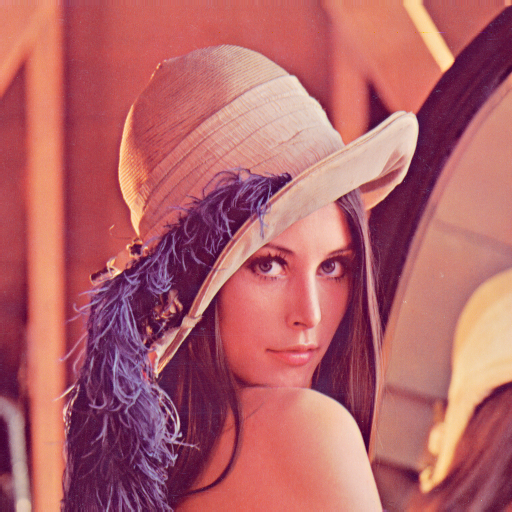

-1

In [3]:
from google.colab.patches import cv2_imshow
from pnslib import utils
import cv2  

from google.colab.patches import cv2_imshow
import cv2
 
image = cv2.imread('/content/Lenna.png', cv2.IMREAD_UNCHANGED)

cv2_imshow(image)
cv2.waitKey(0)

### Sharpen Image: sharpen_image

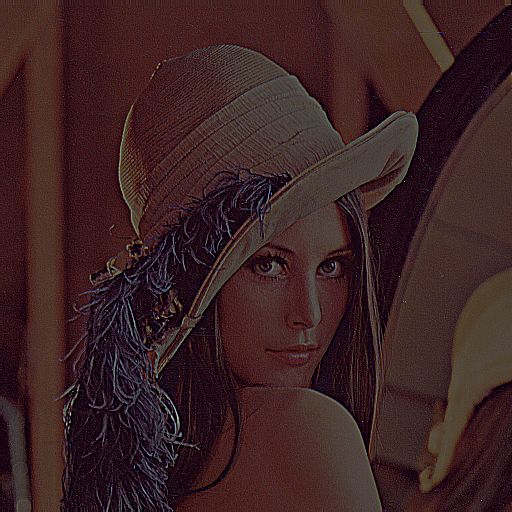

-1

In [5]:
kernel = np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, 0]], np.float32) 

kernel = 1/3 * kernel

image_1 = cv2.filter2D(image, 0, kernel)

cv2_imshow(image_1)
cv2.waitKey(0)

### Emboss Image: emboss_image

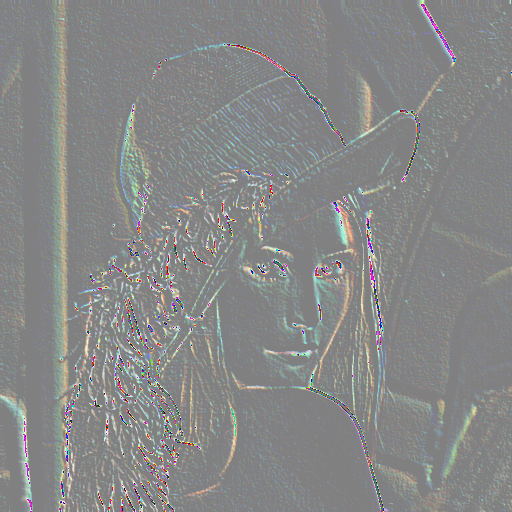

-1

In [6]:
kernel_emboss_1=np.array([[0,-1,-1],[1,0,-1],[1,1,0]])

image_2 = cv2.filter2D(image, -1, kernel_emboss_1)+128

cv2_imshow(image_2)
cv2.waitKey(0)

### Edge Image: edge_image

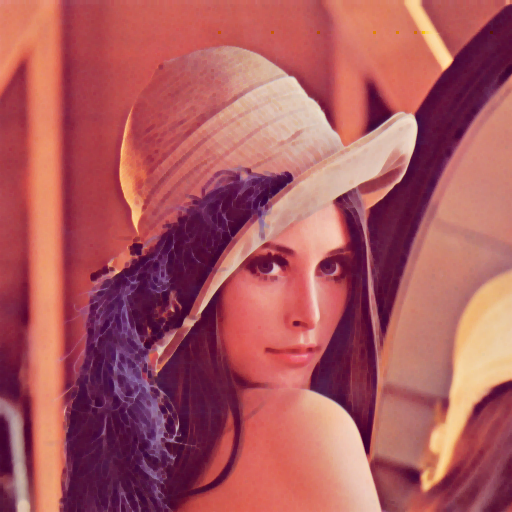

-1

In [8]:
kernel = np.ones((3,3), np.uint8)
image_3 = cv2.erode(image, kernel)

cv2_imshow(image_3)
cv2.waitKey(0)

### Addeptive Gaussian Noise: addeptive_gaussian_noise

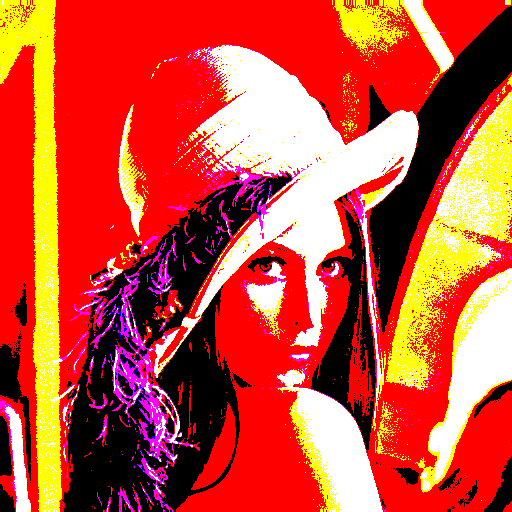

-1

In [9]:
ret,image_4 = cv2.threshold(image,127,255,cv2.THRESH_BINARY)

cv2_imshow(image_4)
cv2.waitKey(0)

### Salt Image: salt_image

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if __name__ == '__main__':


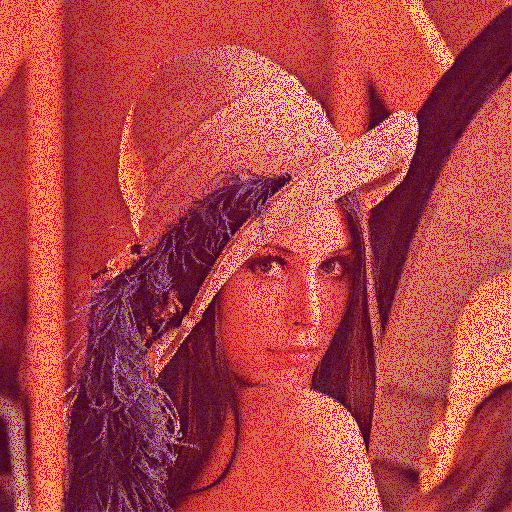

-1

In [11]:
# Declare salt & pepper noise ratio
s_vs_p = 0.5
output = np.copy(image)

num_salt = np.ceil(0.5 * image.size * s_vs_p)

coords = [np.random.randint(0, i - 1, int(num_salt))
            for i in image.shape]
output[coords] = 1

cv2_imshow(output)
cv2.waitKey(0)

### Paper Image: paper_image

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


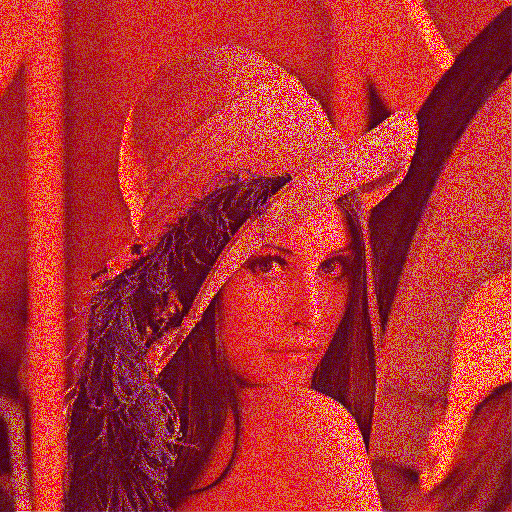

In [27]:
num_pepper = np.ceil(0.5 * img.size * (1. - s_vs_p))
coords = [np.random.randint(0, i - 1, int(num_pepper))
      for i in img.shape]
output[coords] = 0
cv2_imshow(output)

### Salt And Paper Image: salt_and_paper_image

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


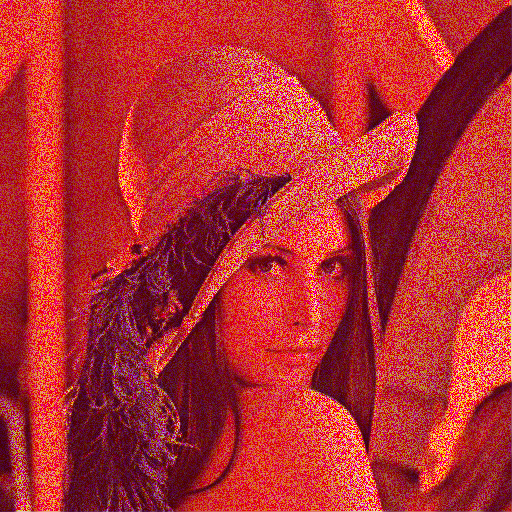

In [15]:
#row, col = image.shape

# Declare salt & pepper noise ratio
s_vs_p = 0.5
output = np.copy(image)

# Apply salt noise on each pixel individually
num_salt = np.ceil(0.5 * image.size * s_vs_p)
coords = [np.random.randint(0, i - 1, int(num_salt))
      for i in image.shape]
output[coords] = 1

# Apply pepper noise on each pixel individually
num_pepper = np.ceil(0.5 * image.size * (1. - s_vs_p))
coords = [np.random.randint(0, i - 1, int(num_pepper))
      for i in image.shape]
output[coords] = 0
cv2_imshow(output)

### Contrast Image: contrast_image

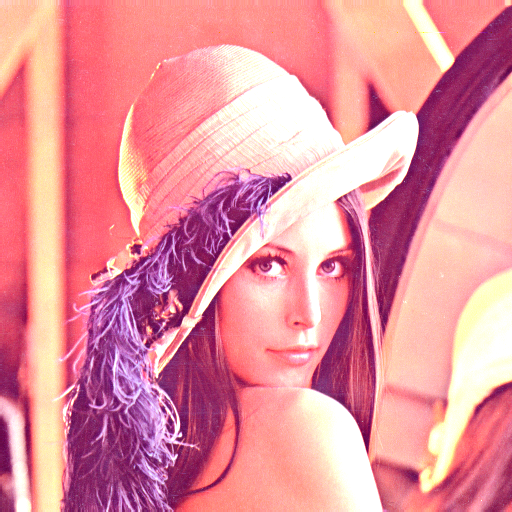

In [16]:
alpha = 1.5 # Contrast control (1.0-3.0)
beta = 0 # Brightness control (0-100)

image_5 = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

cv2_imshow(image_5)

### Edge Detect Canny Image: edge_detect_canny_image

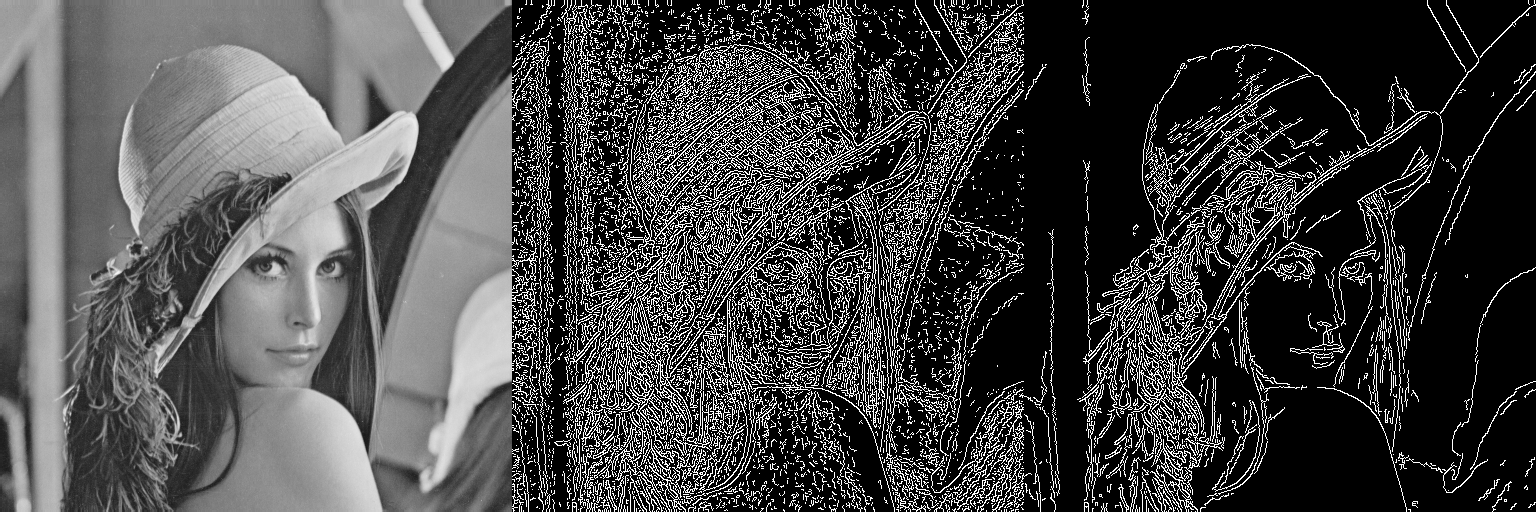

In [18]:
# Converting the image to grayscale.
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Using the Canny filter to get contours
edges = cv2.Canny(gray, 20, 30)
# Using the Canny filter with different parameters
edges_high_thresh = cv2.Canny(gray, 60, 120)
# Stacking the images to print them together
# For comparison
image_6 = np.hstack((gray, edges, edges_high_thresh))

# Display the resulting frame
cv2_imshow(image_6)


### Grayscale Image: grayscale_image

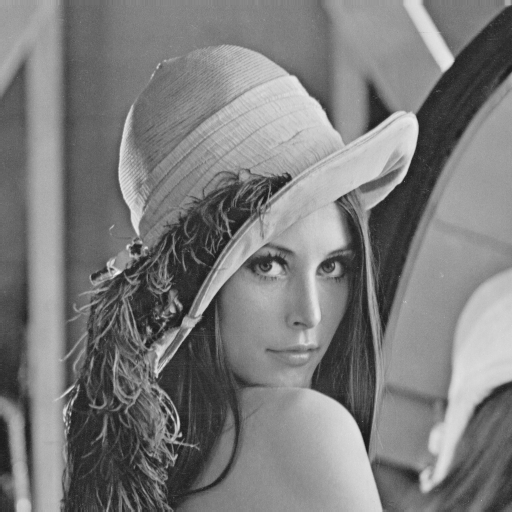

In [19]:
image_7 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the resulting frame
cv2_imshow(image_7)